In [3]:
import numpy as np
import util


def main(train_path, valid_path, save_path):
    """Problem: Logistic regression with Newton's Method.

    Args:
        train_path: Path to CSV file containing dataset for training.
        valid_path: Path to CSV file containing dataset for validation.
        save_path: Path to save predicted probabilities using np.savetxt().
    """
    x_train, y_train = util.load_dataset(train_path, add_intercept=True)
    x_test, y_test = util.load_dataset(valid_path, add_intercept=True)

    # *** START CODE HERE ***
    # Train a logistic regression classifier
    # Plot decision boundary on top of validation set set
    # Use np.savetxt to save predictions on eval set to save_path
    # *** END CODE HERE ***


In [ ]:
class LogisticRegression:
    """Logistic regression with Newton's Method as the solver.

    Example usage:
        > clf = LogisticRegression()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """
    def __init__(self, step_size=0.01, max_iter=10000, eps=1e-5,
                 theta_0=None, verbose=True):
        """
        Args:
            step_size: Step size for iterative solvers only.
            max_iter: Maximum number of iterations for the solver.
            eps: Threshold for determining convergence.
            theta_0: Initial guess for theta. If None, use the zero vector.
            verbose: Print loss values during training.
        """
        self.theta = theta_0
        self.step_size = step_size
        self.max_iter = max_iter
        self.eps = eps
        self.verbose = verbose

    
    
    def fit(self, x, y):
       
        def hypothesis(x, theta):
            return 1/(1 + np.exp(-np.dot(x, theta.T)))
        
        def gradient(x, y, theta):
            m = x.shape[0]
            return -1/(m) * np.dot(x.T, y-hypothesis(x,theta))
        
        def hessian(x,theta):
            h_theta_x = np.reshape(hypothesis(x, theta), (-1, 1))
            m = x.shape[0]
            return 1/m * np.dot(x.T, (h_theta_x * (1 - h_theta_x)) * x)

        if self.theta is None: 
            self.theta = np.zeros(x.shape[1])
        
        def next_theta(theta, x, y):
            return theta - np.dot(np.linalg.inv(hessian(x, theta)), gradient(x, y, theta))

        old_theta = self.theta
        new_theta = next_theta(self.theta, x, y)
        while np.linalg.norm(new_theta - old_theta, 1) >= self.eps:
            old_theta = new_theta
            new_theta = next_theta(old_theta, x, y)

        self.theta = new_theta


    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (n_examples, dim).

        Returns:
            Outputs of shape (n_examples,).
        """
            # *** START CODE HERE ***
        return x @ self.theta >=0
            # *** END CODE HERE ***


x_train shape: (800, 3)
y_train shape: (800,)
x_test shape: (100, 3)
y_test shape: (100,)
Theta is  [-2.40859977  1.03437317  0.24480705]
Predictions are  0.79875


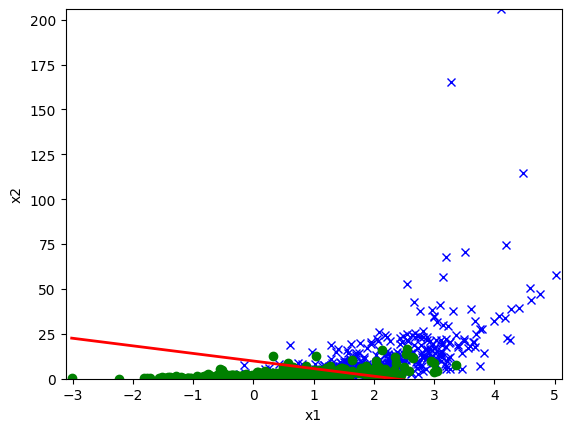

In [5]:
train_path = 'ds1_train.csv'
valid_path = 'ds1_valid.csv'
save_path = 'logreg_pred_1.txt'

x_train, y_train = util.load_dataset(train_path, add_intercept=True)
x_test, y_test = util.load_dataset(valid_path, add_intercept=True)

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

log_reg = LogisticRegression()



log_reg.fit(x_train, y_train)

#main(train_path, valid_path, save_path)

util.plot(x_train, y_train, theta=log_reg.theta, save_path='logreg_pred_1.png')
print("Theta is ", log_reg.theta)
print("Predictions are ", np.mean(log_reg.predict(x_train) == y_train))

The accuracy on validation set is:  0.83


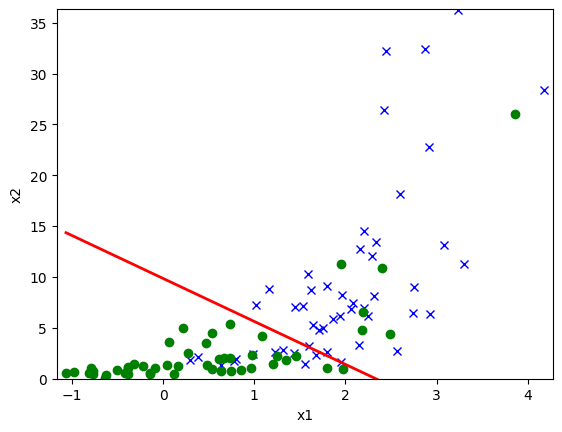

In [6]:
util.plot(x_test, y_test, log_reg.theta, save_path ="logreg_pred_2.png")
print("The accuracy on validation set is: ", np.mean(log_reg.predict(x_test) == y_test))

In [7]:
if __name__ == '__main__':
    main(train_path='ds1_train.csv',
         valid_path='ds1_valid.csv',
         save_path='logreg_pred_1.txt')

    main(train_path='ds2_train.csv',
         valid_path='ds2_valid.csv',
         save_path='logreg_pred_2.txt')